In [1]:
%cd ..

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# Function to plot the time series
def plot_time_series(data, title='Time Series Plot'):
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Function to generate ACF plot
def plot_acf_for_time_series(data, title='ACF Plot', lags=50):
    plt.figure(figsize=(10, 6))
    plot_acf(data, lags=lags, alpha=0.05)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

/Users/vittorio/Vega/research/llms-for-ts


In [77]:
data = pd.read_csv('data/raw/GWT/train.csv')

In [52]:
data.shape

(69680, 8)

In [53]:
data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,9.310,3.550,5.437,1.670,3.868,1.462,9.567000
69676,2018-06-26 19:00:00,10.114,3.550,6.183,1.564,3.716,1.462,9.567000
69677,2018-06-26 19:15:00,10.784,3.349,7.000,1.635,3.746,1.432,9.426000
69678,2018-06-26 19:30:00,11.655,3.617,7.533,1.706,4.173,1.523,9.426000


In [54]:
series = data['OT']
series.index = pd.to_datetime(data['date'], format='ISO8601')

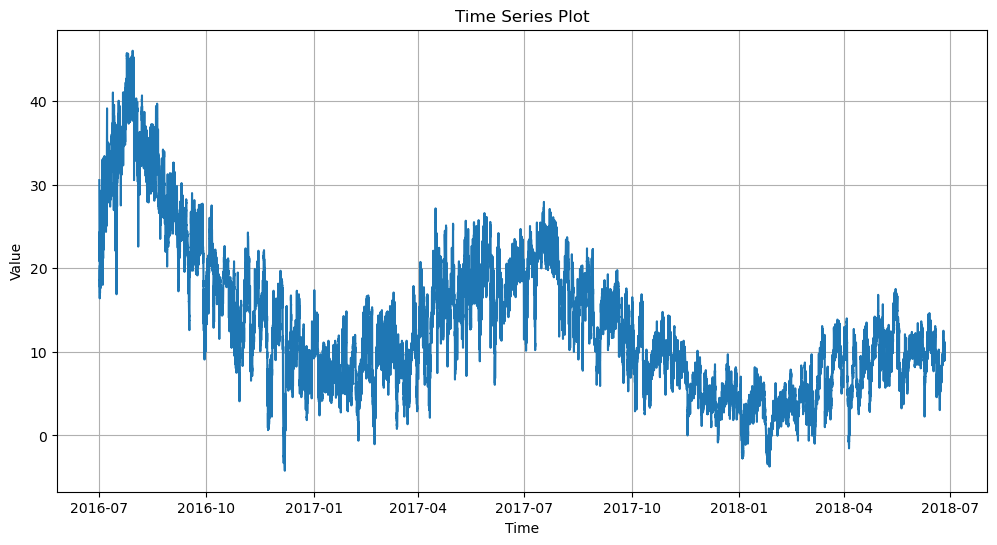

<Figure size 1000x600 with 0 Axes>

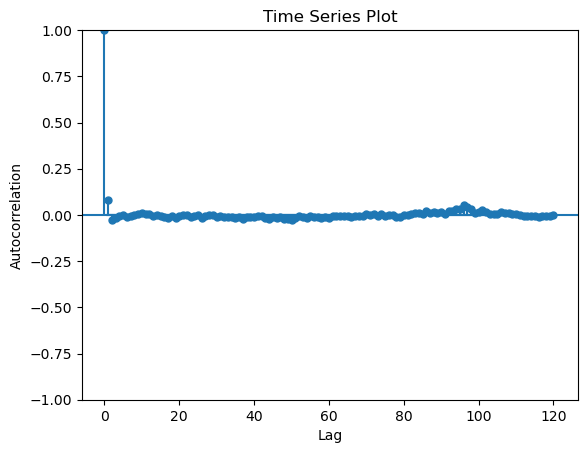

In [58]:
plot_time_series(series)
plot_acf_for_time_series(series.diff().dropna(), title='Time Series Plot', lags=120)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

/var/folders/wq/vgst7v4573g404l2b7hwr3zw0000gn/T/ipykernel_97840/1302245840.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/var/folders/wq/vgst7v4573g404l2b7hwr3zw0000gn/T/ipykernel_97840/1302245840.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/var/folders/wq/vgst7v4573g404l2b7hwr3zw0000gn/T/ipykernel_97840/1302245840.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='OT'>

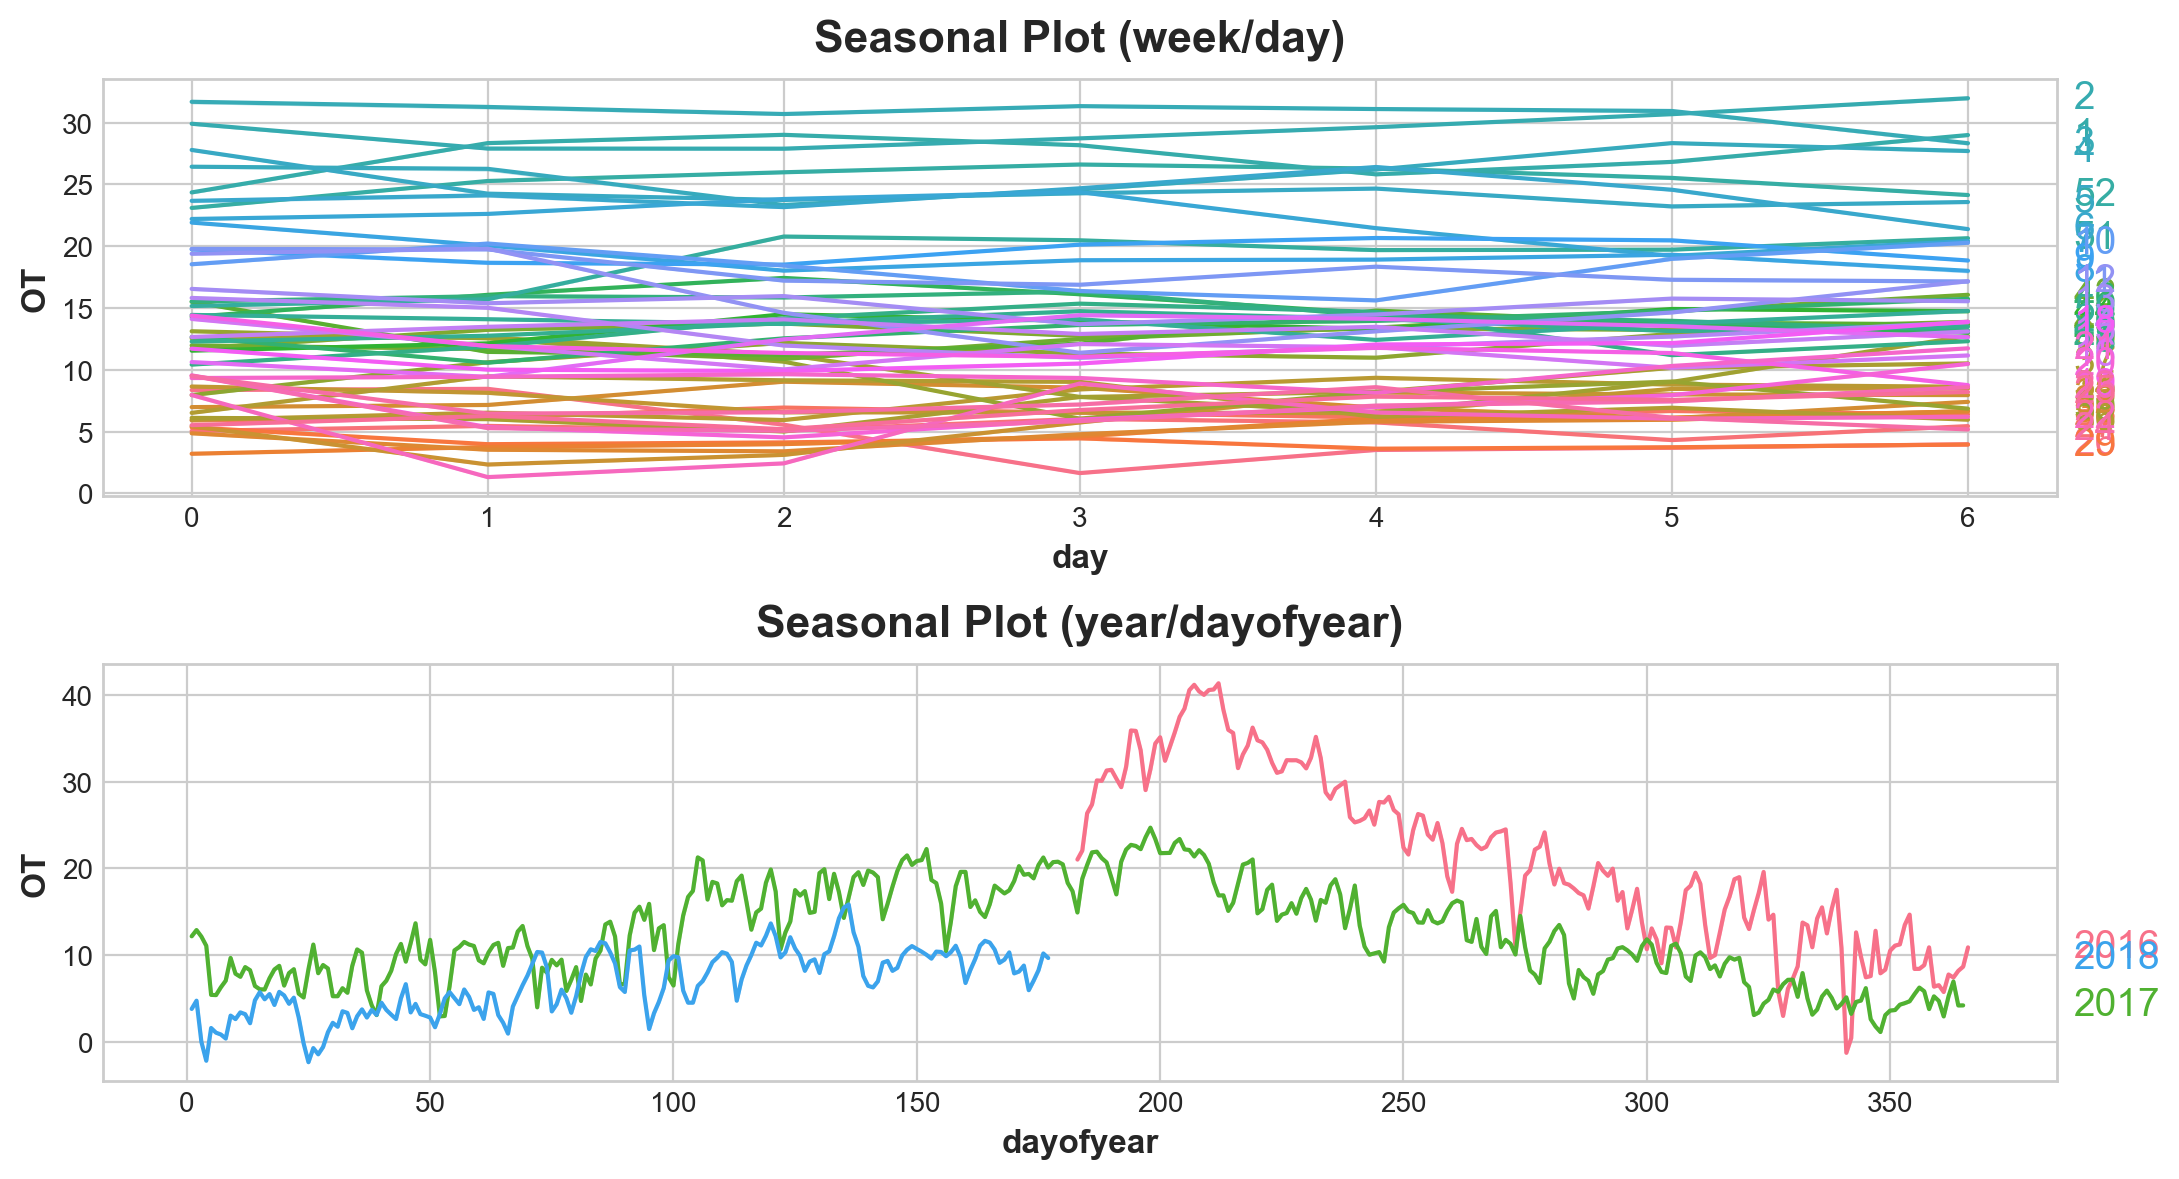

In [76]:
X = data.copy()
# days within a week
X["day"] = pd.to_datetime(X['date']).dt.dayofweek.astype(int)
X["week"] = pd.to_datetime(X['date']).dt.isocalendar().week.astype(int)

# days within a year
X["dayofyear"] = pd.to_datetime(X['date']).dt.dayofyear.astype(int)
X["year"] = pd.to_datetime(X['date']).dt.year.astype(int)
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="OT", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="OT", period="year", freq="dayofyear", ax=ax1)

### GWT Seasonality

In [85]:
series = data.iloc[:, 1:].astype(float).sum()

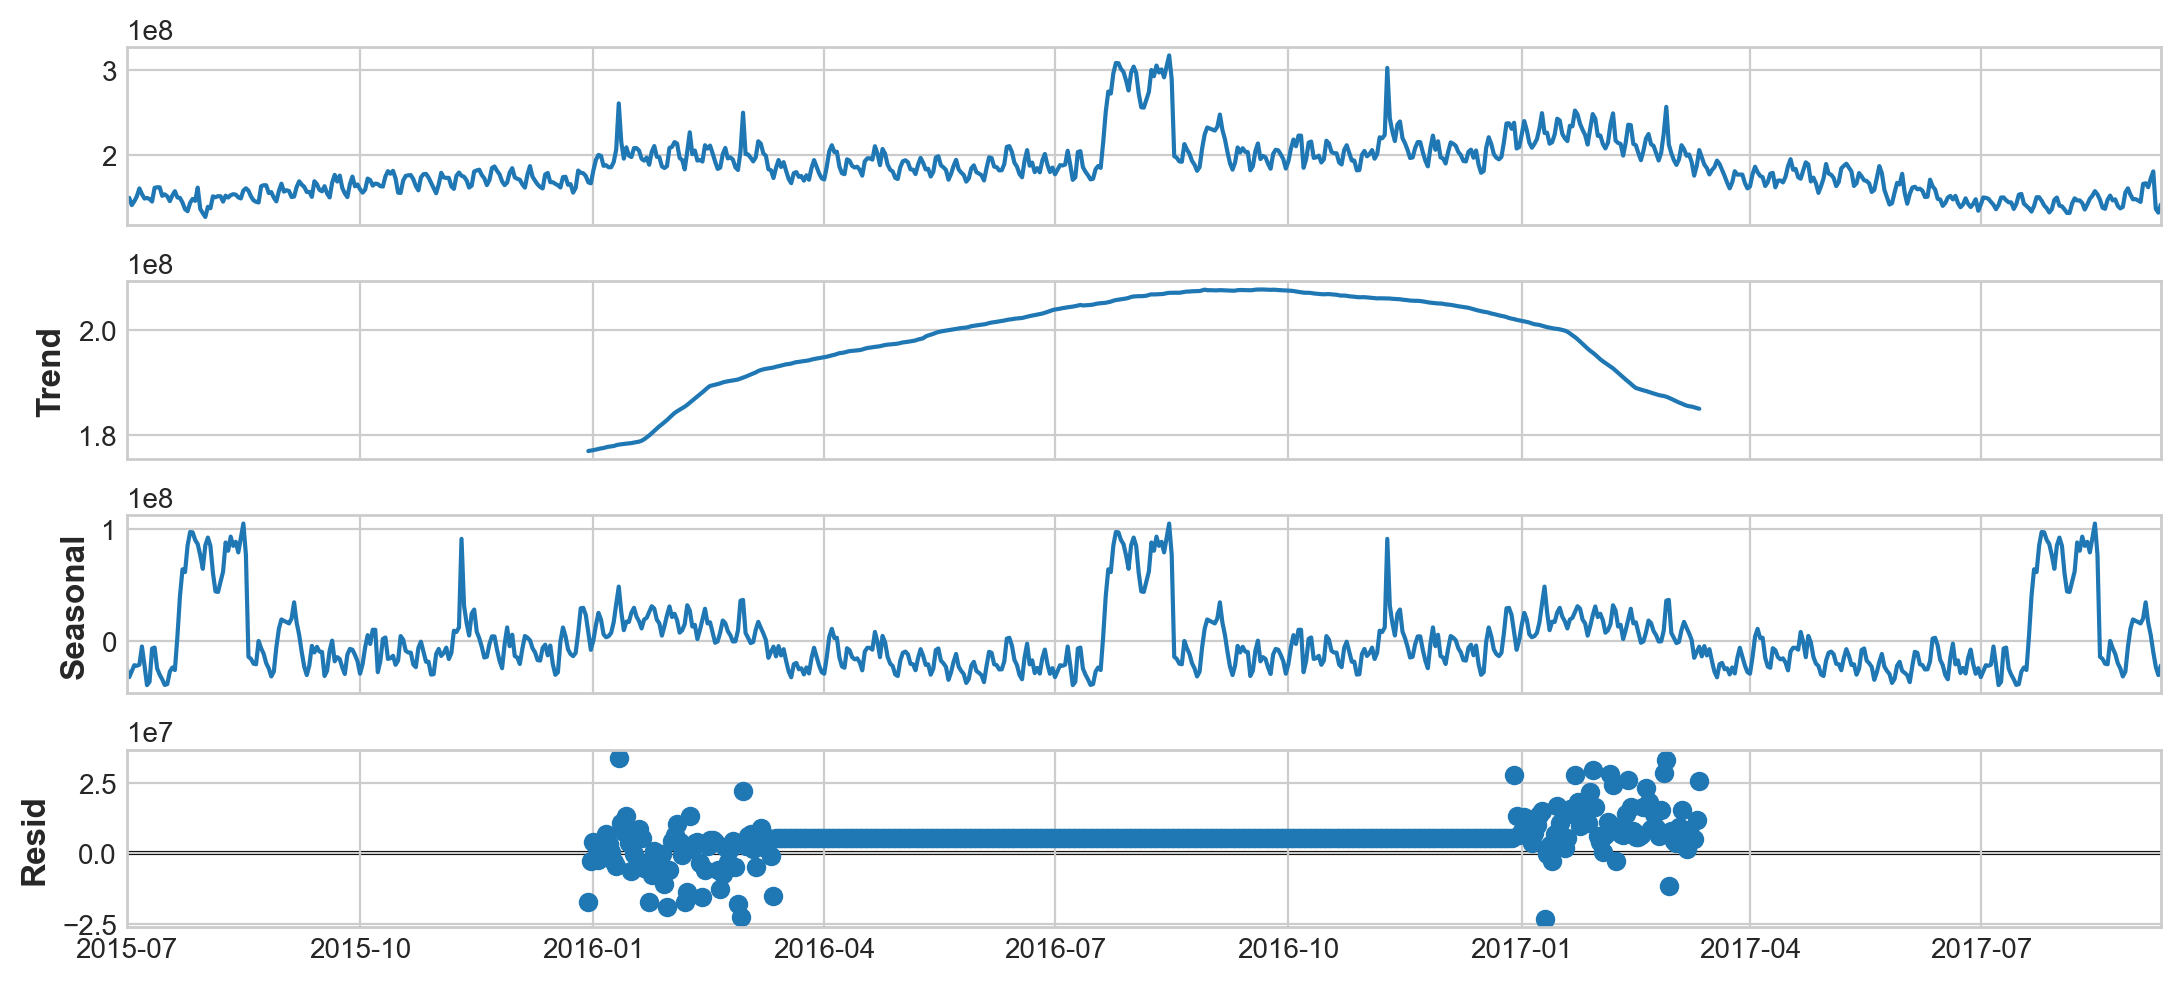

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
#series = data.iloc[200, 1:].dropna()
series.index = pd.to_datetime(data.columns[1:], format='%Y-%m-%d')

result = seasonal_decompose(series, model='additive', period=365)

# Plot the decomposed components
result.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

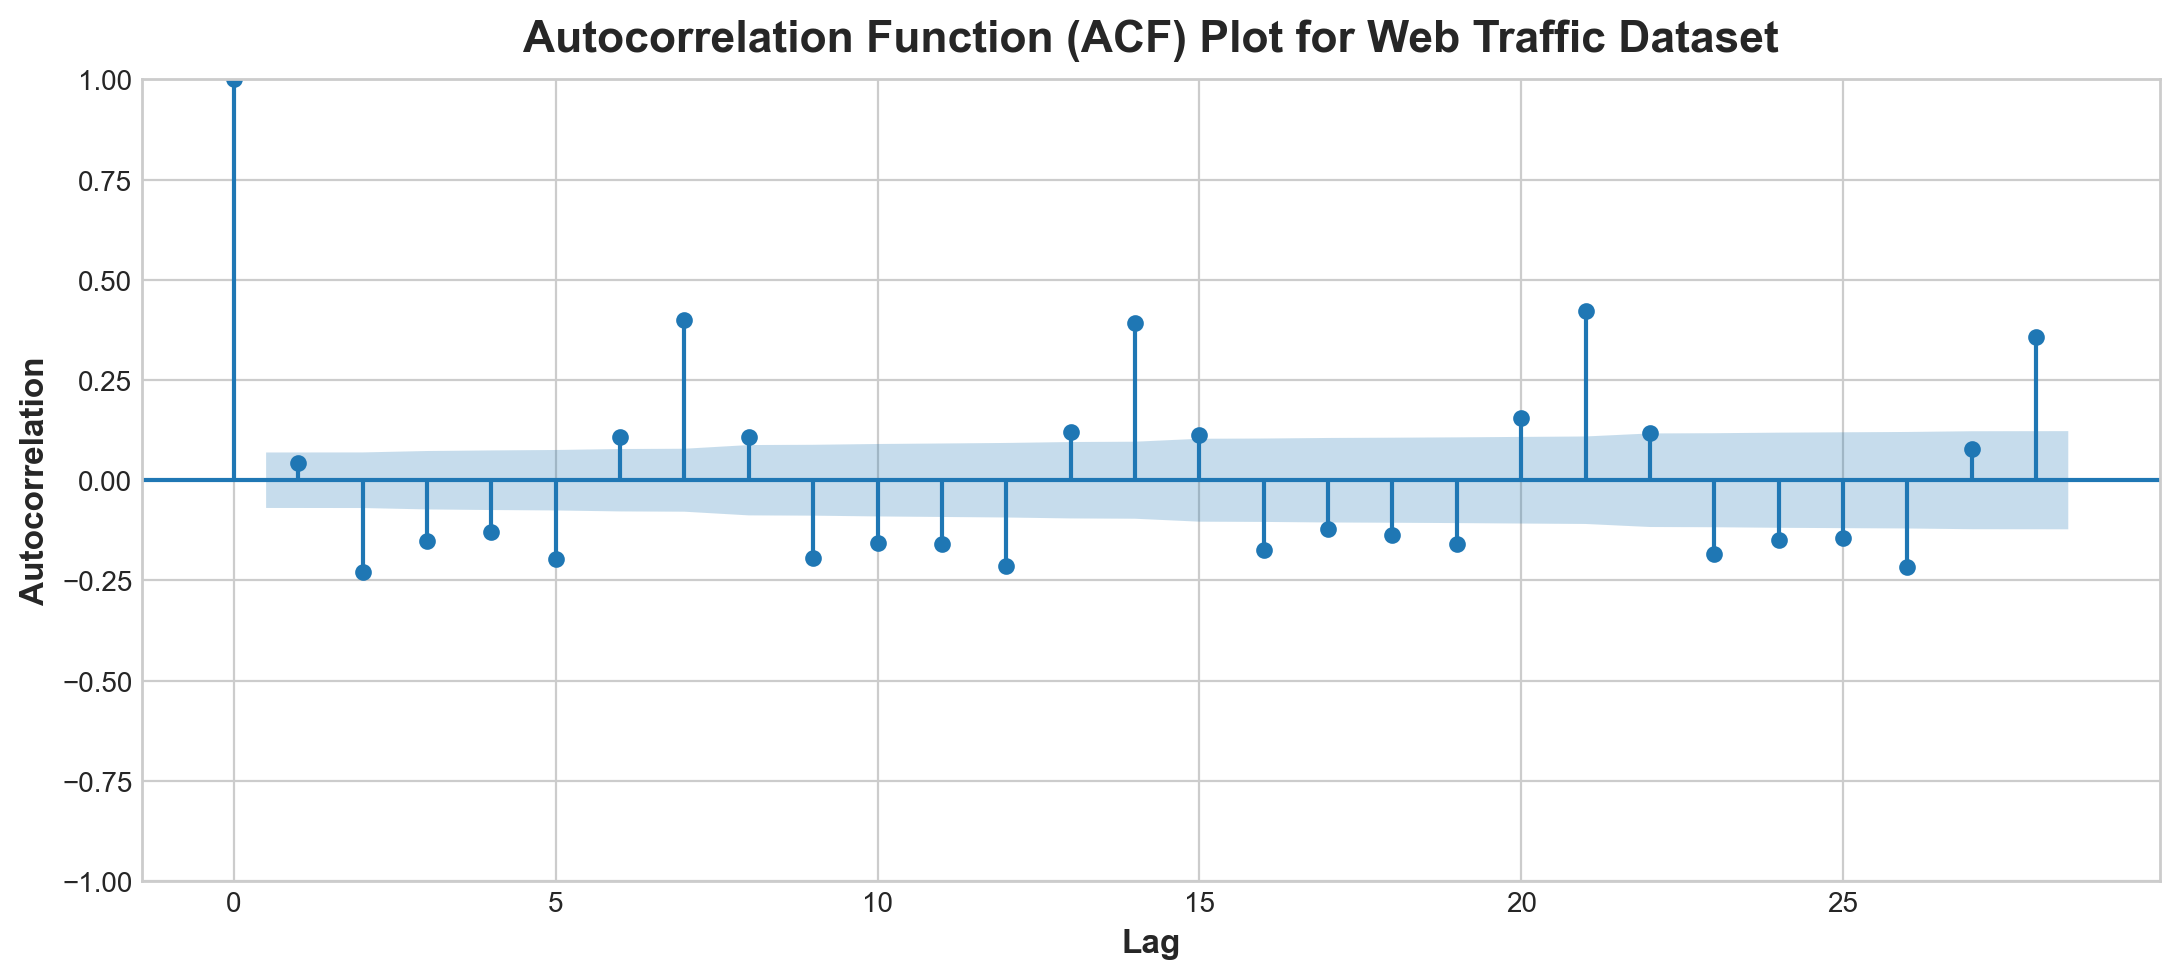

In [100]:
plot_acf_for_time_series(series.diff().dropna(), lags=28, title='Autocorrelation Function (ACF) Plot for Web Traffic Dataset')

In [1]:
%cd ..
import pandas as pd
data = pd.read_csv('data/external/base_512_96_8.csv')

/Users/vittorio/Vega/research/llms-for-ts


In [16]:
import numpy as np

res = np.load("/Users/vittorio/Vega/research/llms-for-ts/data/external/naive_ETTh1_baseline_512_96_8.npy")

In [31]:
data = pd.read_csv('data/external/base_512_96_8.csv', header=None, sep=';')

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B", token='')


/Users/vittorio/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
401 Client Error. (Request ID: Root=1-66684537-2b0cc1711774a6c97371dfd7;9b1f45f3-3b09-49e0-a7b4-a130d5bc0fee)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B is restricted. You must be authenticated to access it.

In [40]:
messages = [
   {'role':'user', 'content':'Given the historical time series data, provide the forecasted values for the next 48 period. Return just predicted numerical values separated by spaces.'},
   {'role':'user', 'content':'23.14 21.67 17.45 19.98 20.12 19.2 18.57 19.56 17.31 19.49 19.13 20.68 18.71 17.87 18.01 18.01 19.77 21.1 19.7 20.05 20.75 21.39 22.23 20.26 21.1 20.61 18.36 20.96 19.42 20.82 20.19 21.32 22.02 20.68 25.47 25.89 27.86 27.3 22.23 21.95 27.3 29.33 26.03 24.34 26.45 25.96 24.06 25.33 23.64 26.38 27.36 28.07 29.48 26.8 29.97 30.39 31.16 29.76 32.29 31.94 28.56 21.53 22.23 19.42 18.57 21.67 25.54 27.86 27.93 24.62 23.85 23.07 22.51 21.67 25.4 25.18 29.55 29.48 29.26 30.95 31.73 33.13 28.98 28.98 31.73 25.18 30.53 27.65 25.47 25.96 25.96 26.03 28.91 30.46 31.38 32.78 31.73 30.32 30.46 32.92 31.09 25.68 27.15 28.77 30.6 32.01 33.13 31.51 31.02 31.44 31.73 30.95 30.46 28.91 30.39 31.51 31.23 30.53 30.11 30.32 29.62 30.53 32.99 30.25 30.25 30.67 31.59 31.94 28.98 27.72 30.67 24.34 29.69 30.25 29.97 29.55 28.49 28.56 28.77 27.72 28.14 27.36 26.73 26.38 25.4 27.93 28.98 29.76 30.6 32.64 35.38 37.28 38.48 36.79 34.12 33.84 33.27 32.92 33.63 32.64 31.59 31.09 30.74 29.33 28.77 29.12 29.26 29.41'} 
]
res = tokenizer.apply_chat_template(messages, return_tensors='pt')
tokenizer.decode(res[0])

'<s><|user|> Given the historical time series data, provide the forecasted values for the next 48 period. Return just predicted numerical values separated by spaces.<|end|><|assistant|><|user|> 23.14 21.67 17.45 19.98 20.12 19.2 18.57 19.56 17.31 19.49 19.13 20.68 18.71 17.87 18.01 18.01 19.77 21.1 19.7 20.05 20.75 21.39 22.23 20.26 21.1 20.61 18.36 20.96 19.42 20.82 20.19 21.32 22.02 20.68 25.47 25.89 27.86 27.3 22.23 21.95 27.3 29.33 26.03 24.34 26.45 25.96 24.06 25.33 23.64 26.38 27.36 28.07 29.48 26.8 29.97 30.39 31.16 29.76 32.29 31.94 28.56 21.53 22.23 19.42 18.57 21.67 25.54 27.86 27.93 24.62 23.85 23.07 22.51 21.67 25.4 25.18 29.55 29.48 29.26 30.95 31.73 33.13 28.98 28.98 31.73 25.18 30.53 27.65 25.47 25.96 25.96 26.03 28.91 30.46 31.38 32.78 31.73 30.32 30.46 32.92 31.09 25.68 27.15 28.77 30.6 32.01 33.13 31.51 31.02 31.44 31.73 30.95 30.46 28.91 30.39 31.51 31.23 30.53 30.11 30.32 29.62 30.53 32.99 30.25 30.25 30.67 31.59 31.94 28.98 27.72 30.67 24.34 29.69 30.25 29.97 29.55

In [58]:
test = """
<|user|>Given the historical time series data, provide the forecasted values for the next {{ target_size }} period. Return just predicted numerical values separated by spaces<|end|>
<|user|>{% for row in data.target %}{{ row }} {% endfor %}<|end|>
<|assistant|>"""

tokenizer.

[]

In [41]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/Users/vittorio/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.
/Users/vittorio/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

In [27]:
msg = "<s><|user|>\nGiven the historical time series data, provide the forecasted values for the next 48 period. Return just predicted numerical values separated by spaces.\n23.14 21.67 17.45 19.98 20.12 19.2 18.57 19.56 17.31 19.49 19.13 20.68 18.71 17.87 18.01 18.01 19.77 21.1 19.7 20.05 20.75 21.39 22.23 20.26 21.1 20.61 18.36 20.96 19.42 20.82 20.19 21.32 22.02 20.68 25.47 25.89 27.86 27.3 22.23 21.95 27.3 29.33 26.03 24.34 26.45 25.96 24.06 25.33 23.64 26.38 27.36 28.07 29.48 26.8 29.97 30.39 31.16 29.76 32.29 31.94 28.56 21.53 22.23 19.42 18.57 21.67 25.54 27.86 27.93 24.62 23.85 23.07 22.51 21.67 25.4 25.18 29.55 29.48 29.26 30.95 31.73 33.13 28.98 28.98 31.73 25.18 30.53 27.65 25.47 25.96 25.96 26.03 28.91 30.46 31.38 32.78 31.73 30.32 30.46 32.92 31.09 25.68 27.15 28.77 30.6 32.01 33.13 31.51 31.02 31.44 31.73 30.95 30.46 28.91 30.39 31.51 31.23 30.53 30.11 30.32 29.62 30.53 32.99 30.25 30.25 30.67 31.59 31.94 28.98 27.72 30.67 24.34 29.69 30.25 29.97 29.55 28.49 28.56 28.77 27.72 28.14 27.36 26.73 26.38 25.4 27.93 28.98 29.76 30.6 32.64 35.38 37.28 38.48 36.79 34.12 33.84 33.27 32.92 33.63 32.64 31.59 31.09 30.74 29.33 28.77 29.12 29.26 29.41 \n<|assistant|>"

In [28]:
encoded = tokenizer.encode(msg)

In [29]:
encoded

[1,
 1,
 32010,
 11221,
 278,
 15839,
 931,
 3652,
 848,
 29892,
 3867,
 278,
 29821,
 28470,
 1819,
 363,
 278,
 2446,
 29871,
 29946,
 29947,
 3785,
 29889,
 7106,
 925,
 25383,
 16259,
 1819,
 13055,
 491,
 8162,
 29889,
 13,
 29906,
 29941,
 29889,
 29896,
 29946,
 29871,
 29906,
 29896,
 29889,
 29953,
 29955,
 29871,
 29896,
 29955,
 29889,
 29946,
 29945,
 29871,
 29896,
 29929,
 29889,
 29929,
 29947,
 29871,
 29906,
 29900,
 29889,
 29896,
 29906,
 29871,
 29896,
 29929,
 29889,
 29906,
 29871,
 29896,
 29947,
 29889,
 29945,
 29955,
 29871,
 29896,
 29929,
 29889,
 29945,
 29953,
 29871,
 29896,
 29955,
 29889,
 29941,
 29896,
 29871,
 29896,
 29929,
 29889,
 29946,
 29929,
 29871,
 29896,
 29929,
 29889,
 29896,
 29941,
 29871,
 29906,
 29900,
 29889,
 29953,
 29947,
 29871,
 29896,
 29947,
 29889,
 29955,
 29896,
 29871,
 29896,
 29955,
 29889,
 29947,
 29955,
 29871,
 29896,
 29947,
 29889,
 29900,
 29896,
 29871,
 29896,
 29947,
 29889,
 29900,
 29896,
 29871,
 29896,
 29

In [42]:
tokenizer.decode(encoded, skip_special_tokens=True)

'Given the historical time series data, provide the forecasted values for the next 48 period. Return just predicted numerical values separated by spaces.\n23.14 21.67 17.45 19.98 20.12 19.2 18.57 19.56 17.31 19.49 19.13 20.68 18.71 17.87 18.01 18.01 19.77 21.1 19.7 20.05 20.75 21.39 22.23 20.26 21.1 20.61 18.36 20.96 19.42 20.82 20.19 21.32 22.02 20.68 25.47 25.89 27.86 27.3 22.23 21.95 27.3 29.33 26.03 24.34 26.45 25.96 24.06 25.33 23.64 26.38 27.36 28.07 29.48 26.8 29.97 30.39 31.16 29.76 32.29 31.94 28.56 21.53 22.23 19.42 18.57 21.67 25.54 27.86 27.93 24.62 23.85 23.07 22.51 21.67 25.4 25.18 29.55 29.48 29.26 30.95 31.73 33.13 28.98 28.98 31.73 25.18 30.53 27.65 25.47 25.96 25.96 26.03 28.91 30.46 31.38 32.78 31.73 30.32 30.46 32.92 31.09 25.68 27.15 28.77 30.6 32.01 33.13 31.51 31.02 31.44 31.73 30.95 30.46 28.91 30.39 31.51 31.23 30.53 30.11 30.32 29.62 30.53 32.99 30.25 30.25 30.67 31.59 31.94 28.98 27.72 30.67 24.34 29.69 30.25 29.97 29.55 28.49 28.56 28.77 27.72 28.14 27.36 26